In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as dates
import mpl_finance as candle
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
from pylab import rcParams


%matplotlib inline

In [442]:
blue_chips = pd.read_csv('BLUECHIPS')

In [443]:
df_relacoes = pd.DataFrame()
for blue_chip in blue_chips['CODIGO DE NEGOCIACAO DO PAPEL']:
    df_relacoes[blue_chip] = pd.read_csv('HISTORICO_2018/' + blue_chip + '_2018')['PRECO FECHAMENTO']

df_relacoes

,PETR4,VALE3,ITUB4,BBDC4,BBAS3,ABEV3,PETR3,ITSA4,SUZB3,GGBR4,...,POMO4,CPFE3,EZTC3,PARD3,TUPY3,VLID3,ALSC3,MPLU3,MAGG3,ALPA4
0,16.55,41.72,43.88,34.60,32.93,21.69,17.33,11.03,18.79,12.97,...,3.94,19.43,22.12,33.50,18.74,19.20,18.05,35.48,49.25,17.60
1,16.70,41.47,44.18,34.74,33.35,21.74,17.55,11.16,18.65,12.95,...,4.05,19.19,21.94,33.20,18.88,19.49,18.16,35.85,50.02,17.17
2,16.73,41.64,45.10,35.31,33.67,21.62,17.70,11.37,18.70,13.65,...,4.17,19.05,22.30,33.07,19.56,19.49,18.13,35.94,51.20,17.15
3,16.83,42.29,45.23,35.51,33.67,21.70,17.84,11.39,18.65,13.48,...,4.12,18.74,21.74,32.38,19.58,19.45,18.05,36.01,51.89,17.45
4,17.03,43.23,45.08,35.50,33.75,21.66,18.12,11.38,19.10,13.95,...,4.04,19.04,21.84,32.00,19.20,19.40,17.99,36.01,51.75,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,21.49,49.81,34.64,38.00,44.08,15.21,24.16,11.88,36.71,14.55,...,4.06,27.72,24.29,18.50,20.40,18.15,18.38,24.76,54.90,16.50
241,21.55,50.86,34.48,37.71,44.09,15.17,24.18,11.75,38.80,14.71,...,4.05,27.99,24.10,18.60,20.00,18.26,18.42,24.80,54.50,16.70
242,21.68,50.44,33.73,36.60,44.38,15.14,24.58,11.60,38.75,14.79,...,3.90,28.20,23.91,17.80,20.00,17.98,18.35,24.85,54.93,16.33
243,21.67,49.50,34.30,37.50,45.12,15.10,24.44,11.80,37.02,14.42,...,3.90,28.48,24.26,18.37,20.03,17.15,18.61,24.93,54.50,16.87


In [444]:
corr_pearson = df_relacoes.corr(method='pearson')
corr_kendall = df_relacoes.corr(method='kendall')
corr_spearman = df_relacoes.corr(method='spearman')

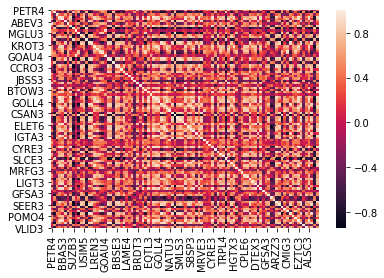

In [445]:
sns.heatmap(corr_pearson)

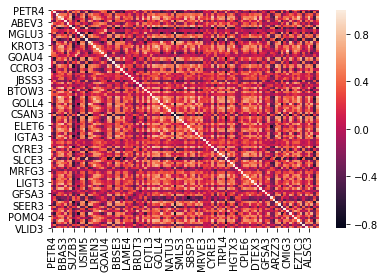

In [446]:
sns.heatmap(corr_kendall)

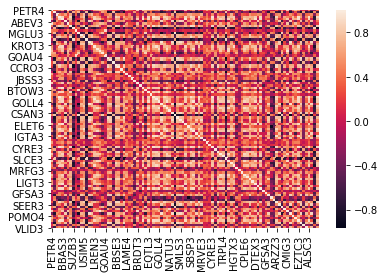

In [447]:
sns.heatmap(corr_spearman)

In [448]:
corr_spearman

,PETR4,VALE3,ITUB4,BBDC4,BBAS3,ABEV3,PETR3,ITSA4,SUZB3,GGBR4,...,POMO4,CPFE3,EZTC3,PARD3,TUPY3,VLID3,ALSC3,MPLU3,MAGG3,ALPA4
PETR4,1.000000,0.331663,0.323149,0.475865,0.715659,-0.186155,0.979326,0.488712,-0.212612,0.459573,...,0.521849,0.743295,0.539884,-0.121362,0.159221,-0.137809,0.433152,-0.380034,-0.227448,0.329228
VALE3,0.331663,1.000000,-0.350583,-0.486995,-0.212404,-0.667860,0.449586,-0.554478,0.678254,0.398086,...,-0.281253,0.288908,-0.397676,-0.838623,0.586766,-0.658942,-0.505840,-0.842438,0.526428,-0.605444
ITUB4,0.323149,-0.350583,1.000000,0.546036,0.388511,0.620262,0.204317,0.687169,-0.559096,0.332735,...,0.350098,0.078193,0.436980,0.499700,-0.424275,0.366915,0.401285,0.520576,-0.287145,0.527764
BBDC4,0.475865,-0.486995,0.546036,1.000000,0.890221,0.306206,0.338368,0.884249,-0.868097,-0.020340,...,0.765660,0.387201,0.945241,0.613137,-0.243774,0.530163,0.919772,0.386193,-0.764463,0.903381
BBAS3,0.715659,-0.212404,0.388511,0.890221,1.000000,-0.000186,0.612352,0.763919,-0.707600,0.058217,...,0.742926,0.674559,0.926846,0.320788,-0.114019,0.258467,0.870400,0.064403,-0.726597,0.773806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VLID3,-0.137809,-0.658942,0.366915,0.530163,0.258467,0.590207,-0.248891,0.562821,-0.548402,0.004818,...,0.468196,-0.353092,0.459000,0.756633,-0.230863,1.000000,0.429570,0.758496,-0.362820,0.565896
ALSC3,0.433152,-0.505840,0.401285,0.919772,0.870400,0.214089,0.312428,0.786657,-0.847999,-0.148905,...,0.738530,0.404874,0.903732,0.580418,-0.208013,0.429570,1.000000,0.344188,-0.787390,0.914206
MPLU3,-0.380034,-0.842438,0.520576,0.386193,0.064403,0.757993,-0.508468,0.469109,-0.591729,-0.168120,...,0.253973,-0.514755,0.264393,0.790749,-0.503435,0.758496,0.344188,1.000000,-0.368901,0.519914
MAGG3,-0.227448,0.526428,-0.287145,-0.764463,-0.726597,-0.058805,-0.095067,-0.605534,0.868472,0.375629,...,-0.643839,-0.280931,-0.787177,-0.529806,0.339509,-0.362820,-0.787390,-0.368901,1.000000,-0.773909


In [449]:
# TODO: ESCOLHER MELHOR QUAIS RESTRIÇÕES DE RELAÇÕES
boa_cor_qtd = 0
par1 = []
par2 = []
correlacao = []
for row in range(len(blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'])):
    for blue_chip in blue_chips['CODIGO DE NEGOCIACAO DO PAPEL']:
        if corr_pearson.iloc[row][blue_chip] > .955:
            if corr_spearman.iloc[row][blue_chip] > .55:
                if corr_kendall.iloc[row][blue_chip] > .55:
                    if blue_chip != blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[row]:
                        boa_cor_qtd = boa_cor_qtd + 1
                        par1.append(blue_chip)
                        par2.append(blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[row])
                        correlacao.append(corr_pearson.iloc[row][blue_chip])


In [450]:
df = pd.DataFrame()
df['Empresa1'] = par1
df['Empresa2'] = par2
df['Correlacao'] = correlacao

df = df.sort_values(by=['Correlacao'],ascending=False).reset_index()
len(df)

22

In [451]:
df = pd.DataFrame()
df['Empresa1'] = par1
df['Empresa2'] = par2
df['Correlacao'] = correlacao
par1 = []
par2 = []

correlacao = []
df = df.sort_values(by=['Correlacao'],ascending=False).reset_index()

for row in range(int(len(df)/2)):
    row = row*2
    par1.append(df.iloc[row]['Empresa1'])
    par2.append(df.iloc[row]['Empresa2'])
    correlacao.append(df.iloc[row+1]['Correlacao'])
    
df_pares = pd.DataFrame()
df_pares['Empresa1'] = par1
df_pares['Empresa2'] = par2
df_pares['Correlacao'] = correlacao
df_pares['Par'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']
save_dir = 'PARESLS/' + 'PARES'
df_pares.to_csv(save_dir,index=False)
df_pares

,Empresa1,Empresa2,Correlacao,Par
0,ELET3,ELET6,0.993322,ELET3_ELET6
1,CMIG3,CMIG4,0.991439,CMIG3_CMIG4
2,PETR3,PETR4,0.981360,PETR3_PETR4
3,BBDC3,BBDC4,0.978631,BBDC3_BBDC4
4,PARD3,UGPA3,0.966861,PARD3_UGPA3
5,BBAS3,ELET3,0.966467,BBAS3_ELET3
6,ELET6,BBAS3,0.964377,ELET6_BBAS3
7,BBDC4,CYRE3,0.961438,BBDC4_CYRE3
8,EZTC3,CYRE3,0.959813,EZTC3_CYRE3
9,QUAL3,CIEL3,0.957738,QUAL3_CIEL3


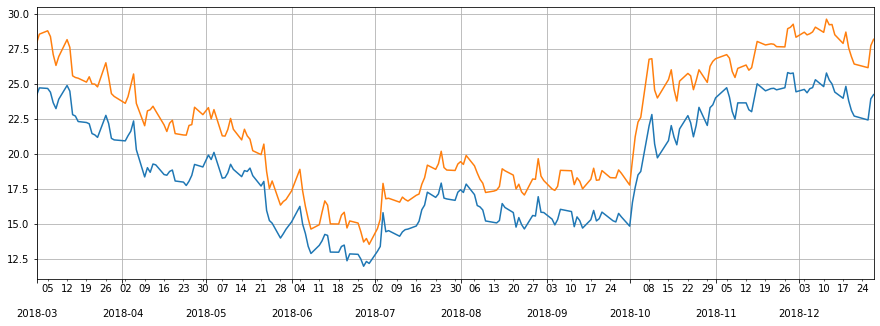

In [452]:
stock1 = pd.read_csv('HISTORICO_2018/ELET3_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
stock2 = pd.read_csv('HISTORICO_2018/ELET6_2018', index_col = 'DATA DO PREGAO', parse_dates=True)

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

fig, ax = plt.subplots()


ax.plot(stock1['PRECO FECHAMENTO'])
ax.plot(stock2['PRECO FECHAMENTO'])


title_stg = stock1['NOME RESUMIDO DA EMPRESA EMISSORA'].iloc[0] + ": " + stock1['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[0]

ax.set_xlim(['2018-03-01', '2018-12-28'])
ax.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

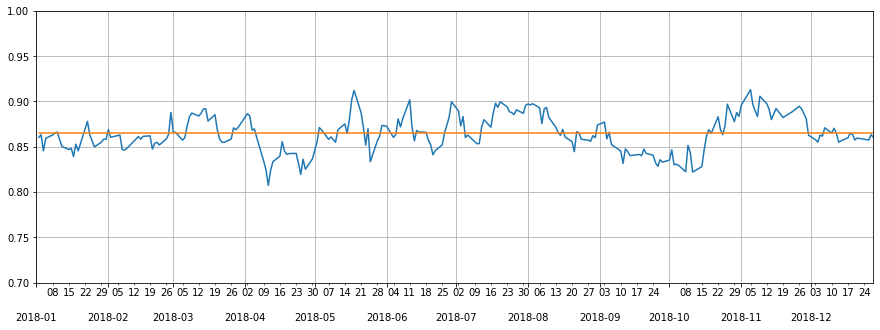

In [453]:
fig, ax = plt.subplots()

stock1['aux'] = stock1['PRECO FECHAMENTO'].mean()/stock2['PRECO FECHAMENTO'].mean()
ax.plot(stock1['PRECO FECHAMENTO']/stock2['PRECO FECHAMENTO'])
ax.plot(stock1['aux'])


ax.set_xlim(['2018-01-01', '2018-12-28'])
ax.set_ylim([.7, 1])

ax.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

In [454]:
for each in range(11):
    stock1 = pd.read_csv('HISTORICO_2018/' + df_pares.iloc[each]['Empresa1'] + '_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
    stock2 = pd.read_csv('HISTORICO_2018/' + df_pares.iloc[each]['Empresa2'] + '_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
    df = pd.DataFrame()
    df['Empresa1'] = stock1['PRECO FECHAMENTO']
    df['Empresa2'] = stock2['PRECO FECHAMENTO']
    df['Par'] = stock1.iloc[0]['CODIGO DE NEGOCIACAO DO PAPEL'] + '_' + stock2.iloc[0]['CODIGO DE NEGOCIACAO DO PAPEL']
    df['Ratio'] = stock1['PRECO FECHAMENTO']/stock2['PRECO FECHAMENTO']
    df['MA_40'] = df['Ratio'].rolling(window=40).mean()
    df['STD_40'] = df['Ratio'].rolling(window=40).std()
    df['BANDA_1_40 SUPERIOR'] = df['MA_40'] + 2* df['STD_40']
    df['BANDA_1_40 INFERIOR'] = df['MA_40'] - 2* df['STD_40']
    df['BANDA_2_40 SUPERIOR'] = df['MA_40'] + 3* df['STD_40']
    df['BANDA_2_40 INFERIOR'] = df['MA_40'] - 3* df['STD_40']
    df['BANDA_3_40 SUPERIOR'] = df['MA_40'] + 4* df['STD_40']
    df['BANDA_3_40 INFERIOR'] = df['MA_40'] - 4* df['STD_40']
    df['PRECO FECHAMENTO'] = df['Ratio']
    save_dir = 'PARESLS/' + stock1['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[0] + "_" + stock2['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[0]
    df = df.reset_index()
    df.to_csv(save_dir,index=False)

In [455]:
df.tail()

,DATA DO PREGAO,Empresa1,Empresa2,Par,Ratio,MA_40,STD_40,BANDA_1_40 SUPERIOR,BANDA_1_40 INFERIOR,BANDA_2_40 SUPERIOR,BANDA_2_40 INFERIOR,BANDA_3_40 SUPERIOR,BANDA_3_40 INFERIOR,PRECO FECHAMENTO
240,2018-12-20,4.93,13.15,BEEF3_QUAL3,0.374905,0.382595,0.019881,0.422356,0.342834,0.442237,0.322953,0.462117,0.303072,0.374905
241,2018-12-21,4.97,12.90,BEEF3_QUAL3,0.385271,0.383544,0.019041,0.421626,0.345463,0.440667,0.326422,0.459707,0.307381,0.385271
242,2018-12-26,4.91,12.69,BEEF3_QUAL3,0.386919,0.384580,0.018018,0.420615,0.348544,0.438633,0.330526,0.456651,0.312508,0.386919
243,2018-12-27,4.89,12.60,BEEF3_QUAL3,0.388095,0.385599,0.016980,0.419558,0.351640,0.436537,0.334660,0.453517,0.317680,0.388095
244,2018-12-28,4.99,12.89,BEEF3_QUAL3,0.387122,0.386259,0.016493,0.419246,0.353273,0.435739,0.336780,0.452232,0.320287,0.387122


In [456]:
df = pd.read_csv(save_dir, index_col = 'DATA DO PREGAO', parse_dates=True)
df.head()

,Empresa1,Empresa2,Par,Ratio,MA_40,STD_40,BANDA_1_40 SUPERIOR,BANDA_1_40 INFERIOR,BANDA_2_40 SUPERIOR,BANDA_2_40 INFERIOR,BANDA_3_40 SUPERIOR,BANDA_3_40 INFERIOR,PRECO FECHAMENTO
DATA DO PREGAO,,,,,,,,,,,,,
2018-01-02,10.89,30.76,BEEF3_QUAL3,0.354031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354031
2018-01-03,10.81,31.00,BEEF3_QUAL3,0.348710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348710
2018-01-04,10.77,31.41,BEEF3_QUAL3,0.342884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342884
2018-01-05,10.89,31.65,BEEF3_QUAL3,0.344076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344076
2018-01-08,10.52,31.30,BEEF3_QUAL3,0.336102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.336102


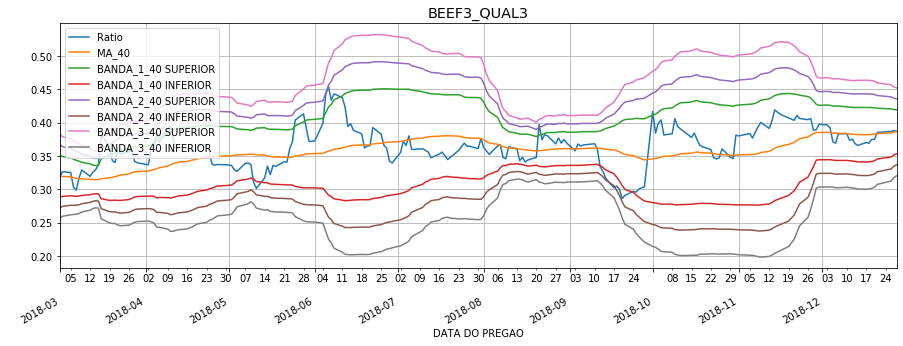

In [457]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

stock_plt = df[['Ratio','MA_40','BANDA_1_40 SUPERIOR','BANDA_1_40 INFERIOR','BANDA_2_40 SUPERIOR','BANDA_2_40 INFERIOR','BANDA_3_40 SUPERIOR','BANDA_3_40 INFERIOR']].plot
title_stg = df.iloc[0]['Par']

stock_plt = stock_plt.line(title = title_stg)

stock_plt.set_xlim(['2018-03-01', '2018-12-28'])
stock_plt.grid()
stock_plt.xaxis.set_major_locator(dates.MonthLocator())
stock_plt.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
stock_plt.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
stock_plt.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# TABELAS AUXILIARES DAS ESTRATEGIAS

In [458]:
df_pares = pd.read_csv('PARESLS/PARES')

df = pd.DataFrame()
df['CODIGO DE NEGOCIACAO DO PAPEL'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']

df['ESTADO'] = 'PROCURANDO ENTRADA'
df['AUX'] = '0'
df['FROZEN'] = '0'


save_dir = 'STRATEGIES/LongShort'
df.to_csv(save_dir,index=False)
df

,CODIGO DE NEGOCIACAO DO PAPEL,ESTADO,AUX,FROZEN
0,ELET3_ELET6,PROCURANDO ENTRADA,0,0
1,CMIG3_CMIG4,PROCURANDO ENTRADA,0,0
2,PETR3_PETR4,PROCURANDO ENTRADA,0,0
3,BBDC3_BBDC4,PROCURANDO ENTRADA,0,0
4,PARD3_UGPA3,PROCURANDO ENTRADA,0,0
5,BBAS3_ELET3,PROCURANDO ENTRADA,0,0
6,ELET6_BBAS3,PROCURANDO ENTRADA,0,0
7,BBDC4_CYRE3,PROCURANDO ENTRADA,0,0
8,EZTC3_CYRE3,PROCURANDO ENTRADA,0,0
9,QUAL3_CIEL3,PROCURANDO ENTRADA,0,0


# TABELAS DE OPERAÇÕES

In [459]:
df = pd.DataFrame()
df['CODIGO DE NEGOCIACAO DO PAPEL'] = ['']
df['DATA DO PREGAO'] = ['']
df['PRECO'] = ['']
df['OPERACAO'] = ['']

save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
df.head()

,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,,,,


# RESULTADO

In [3]:
# Pega ordens:
df = pd.read_csv('BACK_TEST/LongShort')
df = df.dropna()
save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/LongShort', parse_dates=['DATA DO PREGAO'])
print(len(orders_df))
orders_df.head()

119


,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,PARD3_UGPA3,2018-03-07,0.426849,SELL
1,ELET3_ELET6,2018-03-08,0.879821,SELL
2,EZTC3_CYRE3,2018-03-08,1.634273,SELL
3,BEEF3_QUAL3,2018-03-15,0.335995,SELL
4,QUAL3_CIEL3,2018-03-16,1.097888,BUY


In [9]:
# Pegando as ordens
df = pd.read_csv('BACK_TEST/LongShort')
df = df.dropna()
save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/LongShort', parse_dates=['DATA DO PREGAO'])
orders_df = orders_df[df['CODIGO DE NEGOCIACAO DO PAPEL'] == 'ELET3_ELET6'].reset_index()
orders_df.head()

,index,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,1,ELET3_ELET6,2018-03-08,0.879821,SELL
1,5,ELET3_ELET6,2018-03-21,0.865654,BUY
2,13,ELET3_ELET6,2018-04-09,0.838389,BUY
3,26,ELET3_ELET6,2018-05-03,0.857525,SELL
4,33,ELET3_ELET6,2018-05-17,0.894958,SELL


In [10]:
# Pegando os dados
stock = pd.read_csv('PARESLS/ELET3_ELET6', index_col = 'DATA DO PREGAO', parse_dates=True)
stock['date_ax'] = stock.index
stock['date_ax'] = stock['date_ax'].apply(lambda date: date2num(date))


# Intervalo desejado
stock = stock.loc['2018-03-01' : '2018-12-28'].reset_index()

candle_values = [tuple(vals) for vals in stock[['date_ax', 'Ratio', 'Ratio', 'Ratio', 'Ratio']].values]


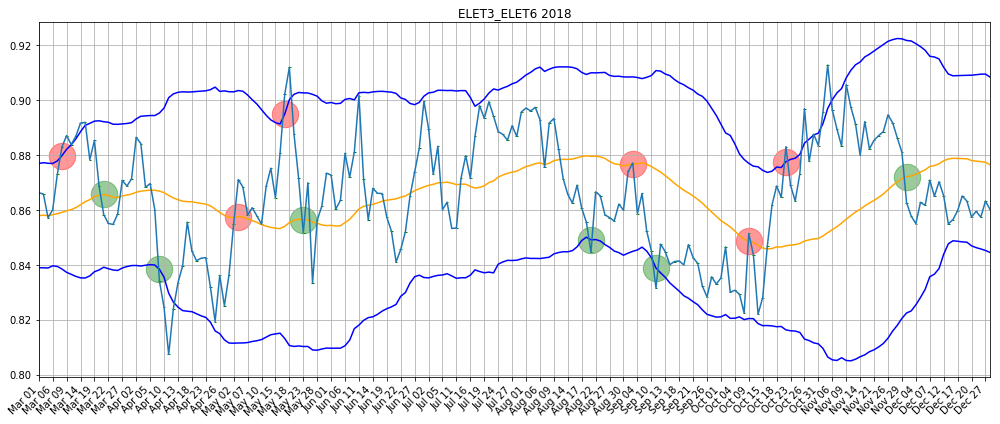

In [13]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(ncols=1, figsize=(14, 6))

# Parâmetros pro candle plot
fmt='%b %d'
freq=3
width=0.55
ohlc_data = candle_values

# Remover Final de Semana
# Convert data to numpy array 
ohlc_data_arr = np.array(ohlc_data)
ohlc_data_arr2 = np.hstack(
    [np.arange(ohlc_data_arr[:,0].size)[:,np.newaxis], ohlc_data_arr[:,1:]])
ndays = ohlc_data_arr2[:,0]  # array([0, 1, 2, ... n-2, n-1, n])

# Convert matplotlib date numbers to strings based on `fmt`
dates = mdates.num2date(ohlc_data_arr[:,0])
date_strings = []
for date in dates:
    date_strings.append(date.strftime(fmt))

# Plot candlestick chart
candle.candlestick_ohlc(ax, ohlc_data_arr2, width, colorup = 'g', colordown = 'r')
plt.grid()

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

# Plot indicadores
ax.plot(ohlc_data_arr2[:,0],stock['MA_40'], color = "orange")
ax.plot(ohlc_data_arr2[:,0],stock['BANDA_1_40 SUPERIOR'], color = "blue")
ax.plot(ohlc_data_arr2[:,0],stock['BANDA_1_40 INFERIOR'], color = "blue")

# Formating
ax.set_xticks(ndays[::freq])
ax.set_xticklabels(date_strings[::freq], rotation=45, ha='right', fontsize='medium')
ax.set_xlim(ndays.min(), ndays.max())
ax.set_title(stock['Par'].iloc[0] + " 2018")
plt.tight_layout()
plt.grid()

# Adjusting order index
new_order_id = []
order_id = 0
for each in range(len(stock)):
    if orders_df['DATA DO PREGAO'].iloc[order_id] == stock['DATA DO PREGAO'].iloc[each]:
        new_order_id.append(each)
        order_id = order_id + 1
    if order_id >= len(orders_df):
        break
    

# Plot ordens

for each_order in range(len(new_order_id)):
    if orders_df['OPERACAO'].iloc[each_order] == 'SELL':
        cor = 'red'
    else:
        cor = 'green'
    ax.scatter(new_order_id[each_order],orders_df['PRECO'].iloc[each_order], s=700, c=cor, alpha=.4)
plt.grid()

ax.plot(stock['Ratio'])

  

In [19]:
# Pega ordens:
df = pd.read_csv('BACK_TEST/LongShort')
df = df.dropna()
save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/LongShort', parse_dates=['DATA DO PREGAO'])
print(len(orders_df))
orders_df.head()

119


,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,PARD3_UGPA3,2018-03-07,0.426849,SELL
1,ELET3_ELET6,2018-03-08,0.879821,SELL
2,EZTC3_CYRE3,2018-03-08,1.634273,SELL
3,BEEF3_QUAL3,2018-03-15,0.335995,SELL
4,QUAL3_CIEL3,2018-03-16,1.097888,BUY


In [20]:
# Pega id das ordens não fechadas
id_to_remove = []
pares = pd.read_csv('PARESLS/PARES')
for par in pares['Par']:
    df = orders_df[orders_df['CODIGO DE NEGOCIACAO DO PAPEL'] == par].reset_index()
    if len(df)%2:
        id_to_remove.append(df.iloc[len(df)-1]['index'])
id_to_remove

[94, 114, 117, 118, 105]

In [21]:
# Remove as ordens nao fechadas pelo id
lucro = 0
id_to_remove.sort(reverse=True)
for each_id in id_to_remove:
    orders_df = orders_df.drop(orders_df.index[each_id])
id_to_remove = []
print(len(orders_df))

114


In [32]:
# Armazena os lucros individuais de cada ordem

ordem_fechada = []
operacoes_prejuizo = 0
for par in pares['Par']:
    df = orders_df[orders_df['CODIGO DE NEGOCIACAO DO PAPEL'] == par].reset_index()
    for i in range(int(len(df)/2)):
        i = i*2
        if df.iloc[i]['OPERACAO'] == 'BUY':
            # Se eu comprei antes, lucro = venda futura - compra presente
            lucro = (df.iloc[i+1]['PRECO'] - df.iloc[i]['PRECO'])/df.iloc[i]['PRECO']
        else:
            # Se eu vendi antes, lucro = venda atual - compra futura
            lucro = (df.iloc[i]['PRECO'] - df.iloc[i+1]['PRECO'])/df.iloc[i]['PRECO']
        ordem_fechada.append(lucro*100)
        
        if lucro*100 < 0:
            print("Operacoes com prejuízo: " + str(round(lucro*100,2)) + "% em: " + df.iloc[i]['CODIGO DE NEGOCIACAO DO PAPEL'])
            operacoes_prejuizo = operacoes_prejuizo + 1
operacoes_prejuizo

Operacoes com prejuízo: -2.3% em: PETR3_PETR4
Operacoes com prejuízo: -0.67% em: PETR3_PETR4
Operacoes com prejuízo: -3.22% em: BBDC3_BBDC4
Operacoes com prejuízo: -1.23% em: ELET6_BBAS3
Operacoes com prejuízo: -3.78% em: BEEF3_QUAL3


5

In [52]:
porcentagem_acerto = 100*(len(ordem_fechada) - operacoes_prejuizo)/len(ordem_fechada)
round(porcentagem_acerto,2)      
porcentagem_acerto = str(porcentagem_acerto) + '%'

Quantidade de ordens: 114
Quantidade de operações FECHADAS: 57
Média de lucro das ordens: 3.8527031978314095
Somatório de lucro individual: 219.60408227639033
Operações com lucro: 52
Operações com prejuízo: 5
Porcentagem de acerto da estratégia: 91.23%


<BarContainer object of 57 artists>

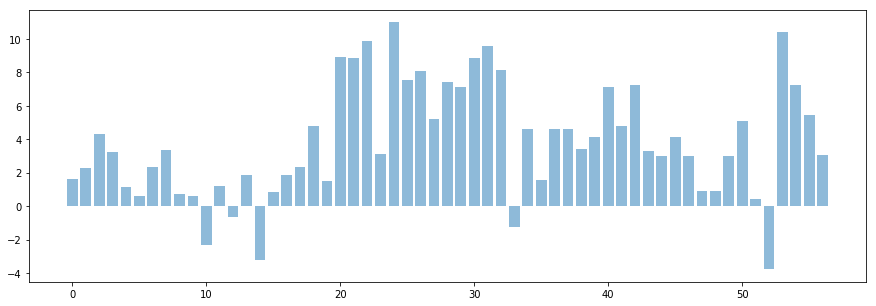

In [59]:
porcentagem_acerto = 100*(len(ordem_fechada) - operacoes_prejuizo)/len(ordem_fechada)
porcentagem_acerto = round(porcentagem_acerto,2)      
porcentagem_acerto = str(porcentagem_acerto) + '%'

print("Quantidade de ordens: " + str(len(ordem_fechada*2)))
print("Quantidade de operações FECHADAS: " + str(len(ordem_fechada)))
print("Média de lucro das ordens: " + str(sum(ordem_fechada)/len(ordem_fechada)))
print("Somatório de lucro individual: " + str(sum(ordem_fechada)))
print("Operações com lucro: " + str(len(ordem_fechada) - operacoes_prejuizo))
print("Operações com prejuízo: " + str(operacoes_prejuizo))
print("Porcentagem de acerto da estratégia: " + porcentagem_acerto)

x_values = np.arange(len(ordem_fechada))

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

plt.bar(x_values, ordem_fechada, align='center', alpha=0.5)

(array([2., 1., 0., 1., 1., 3., 6., 5., 3., 9., 3., 6., 2., 0., 4., 2., 2.,
        3., 2., 2.]),
 array([-3.77800825, -3.03945046, -2.30089268, -1.5623349 , -0.82377711,
        -0.08521933,  0.65333845,  1.39189624,  2.13045402,  2.86901181,
         3.60756959,  4.34612737,  5.08468516,  5.82324294,  6.56180072,
         7.30035851,  8.03891629,  8.77747407,  9.51603186, 10.25458964,
        10.99314743]),
 <a list of 20 Patch objects>)

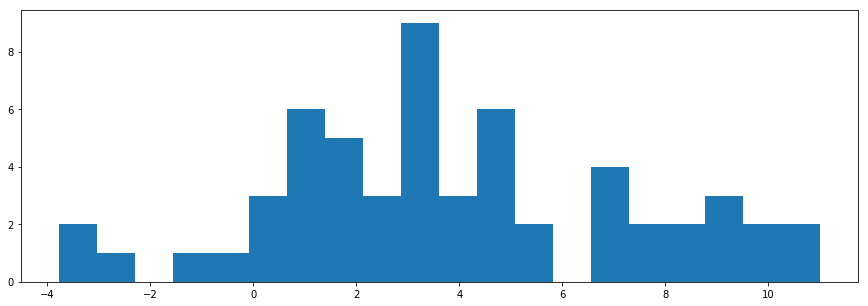

In [60]:
plt.hist(ordem_fechada,bins=20)

In [81]:
# Dataframe para auxilar no calculo da carteira ls

df_pares = pd.read_csv('PARESLS/PARES')

df_c_ls = pd.DataFrame()
df_c_ls['CODIGO DE NEGOCIACAO DO PAPEL'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']
df_c_ls['ESTADO'] = 'FECHADA'
df_c_ls['CAPITAL ALOCADO'] = '0'

df_c_ls = df_c_ls.set_index('CODIGO DE NEGOCIACAO DO PAPEL')
df_c_ls
# df_c_ls.loc['PETR3_PETR4']['ESTADO'] returns 'FECHADA'

,ESTADO,CAPITAL ALOCADO
CODIGO DE NEGOCIACAO DO PAPEL,,
ELET3_ELET6,FECHADA,0
CMIG3_CMIG4,FECHADA,0
PETR3_PETR4,FECHADA,0
BBDC3_BBDC4,FECHADA,0
PARD3_UGPA3,FECHADA,0
BBAS3_ELET3,FECHADA,0
ELET6_BBAS3,FECHADA,0
BBDC4_CYRE3,FECHADA,0
EZTC3_CYRE3,FECHADA,0


In [82]:
orders_df.head()

,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,PARD3_UGPA3,2018-03-07,0.426849,SELL
1,ELET3_ELET6,2018-03-08,0.879821,SELL
2,EZTC3_CYRE3,2018-03-08,1.634273,SELL
3,BEEF3_QUAL3,2018-03-15,0.335995,SELL
4,QUAL3_CIEL3,2018-03-16,1.097888,BUY


,ESTADO,CAPITAL ALOCADO
CODIGO DE NEGOCIACAO DO PAPEL,,
ELET3_ELET6,ABERTA,70601.2
CMIG3_CMIG4,FECHADA,62590.8
PETR3_PETR4,FECHADA,71259.2
BBDC3_BBDC4,FECHADA,58892.1
PARD3_UGPA3,ABERTA,71314.3
BBAS3_ELET3,FECHADA,55915.7
ELET6_BBAS3,FECHADA,50832.8
BBDC4_CYRE3,FECHADA,64182.8
EZTC3_CYRE3,ABERTA,63540.3


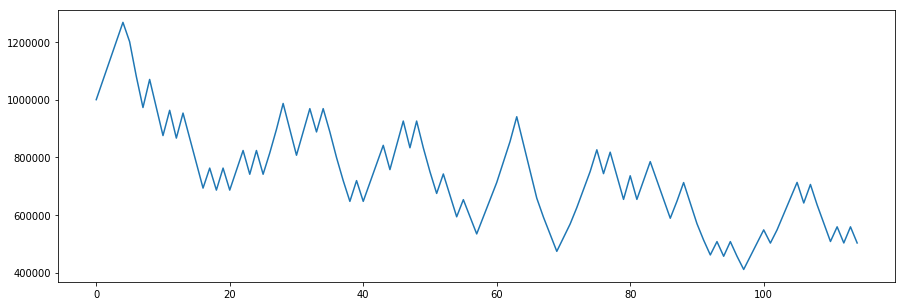

In [87]:
# Carteira inicial R$ 1.000.000
# Teste dividindo a carteira em 10 lotes
carteira = 1000000
carteira_hist = [1000000]
for i in range(len(orders_df)):
    order = orders_df.iloc[i]
    if df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] == 'FECHADA': # CALCULA ENTRADA
        disponivel = carteira/10
        quantidade_papel = round(disponivel/order['PRECO'])
        investimento = quantidade_papel * order['PRECO']
        if order['OPERACAO'] == 'BUY':
            carteira = carteira - investimento
        elif order['OPERACAO'] == 'SELL':
            carteira = carteira + investimento
        df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] = 'ABERTA'
        df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['CAPITAL ALOCADO'] = investimento
    else:
        disponivel = df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['CAPITAL ALOCADO']
        if order['OPERACAO'] == 'BUY':
            carteira = carteira - investimento
        elif order['OPERACAO'] == 'SELL':
            carteira = carteira + investimento
        df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] = 'FECHADA'
        
    carteira_hist.append(carteira) 


plt.plot(carteira_hist)
df_c_ls

In [436]:
# # Carteira inicial R$ 1.000.000
# melhor_carteira = 0
# best_p = 0
# carteiras = []
# for porcentagem in range(250):
#     porcentagem = porcentagem + 20
#     carteira = 1000000
#     carteira_hist = [1000000]
#     for i in range(len(orders_df)):
#         order = orders_df.iloc[i]
#         disponivel = carteira/porcentagem
#         quantidade_papel = round(disponivel/order['PRECO'])
#         if order['OPERACAO'] == 'BUY':
#             carteira = carteira - quantidade_papel* order['PRECO']
#         elif order['OPERACAO'] == 'SELL':
#             carteira = carteira + quantidade_papel* order['PRECO']
#         carteira_hist.append(carteira) 
#     if carteira > melhor_carteira:
#         melhor_carteira = carteira
#         best_p = porcentagem
#     carteiras.append(carteira)

In [437]:
print(best_p)
print("Valor final da carteira: ")
print(melhor_carteira)
print("\nPorcentagem em cada operação: ")
print(100/best_p)

((melhor_carteira - 1000000)/1000000) * 100

269
Valor final da carteira: 
999917.9383620657

Porcentagem em cada operação: 
0.37174721189591076


-0.008206163793429732

In [438]:
carteira = 1000000
carteira_hist = [1000000]
for i in range(len(orders_df)):
    order = orders_df.iloc[i]
    disponivel = carteira/best_p
    quantidade_papel = round(disponivel/order['PRECO'])
    if order['OPERACAO'] == 'BUY':
        carteira = carteira - quantidade_papel* order['PRECO']
    elif order['OPERACAO'] == 'SELL':
        carteira = carteira + quantidade_papel* order['PRECO']
    carteira_hist.append(carteira)
carteira


# AQUI ESTA A MERDA QUE EU TAVA FAZENDOOOOOO!!!!!!!!!!!!!!! TENHO QUE COMPRAR A MESMA QUANTIA USADA PARA ABRIR A OPERACAO!!! 
# MESMO TUDO POSITIVO TAVA DANDO NEGATIVO!!!!

999917.9383620657

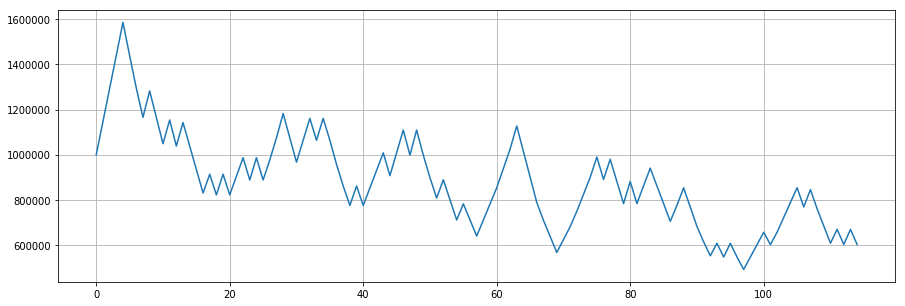

In [86]:
plt.plot(carteira_hist)
plt.grid()

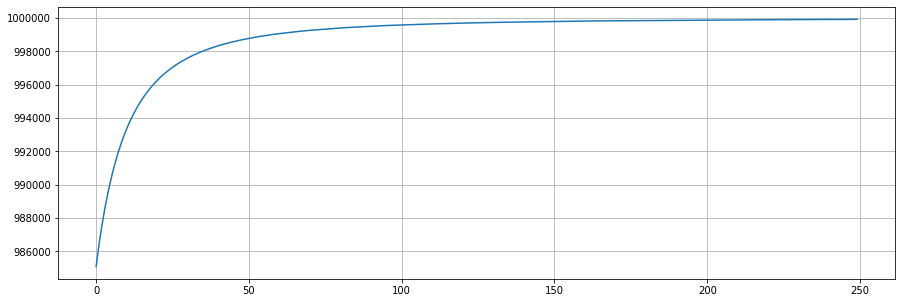

In [440]:
plt.plot(carteiras)
plt.grid()


In [190]:
strategy = pd.read_csv("STRATEGIES/LongShort")
#strategy = strategy.set_index('CODIGO DE NEGOCIACAO DO PAPEL')
strategy

,CODIGO DE NEGOCIACAO DO PAPEL,ESTADO,AUX,FROZEN
0,ELET3_ELET6,PROCURANDO ENTRADA,0,0
1,CMIG3_CMIG4,PROCURANDO ENTRADA,0,0
2,PETR3_PETR4,PROCURANDO ENTRADA,0,0
3,BBDC3_BBDC4,PROCURANDO ENTRADA,0,0
4,PARD3_UGPA3,PROCURANDO ENTRADA,0,0
5,BBAS3_ELET3,PROCURANDO ENTRADA,0,0
6,ELET6_BBAS3,PROCURANDO ENTRADA,0,0
7,BBDC4_CYRE3,PROCURANDO ENTRADA,0,0
8,EZTC3_CYRE3,PROCURANDO ENTRADA,0,0
9,QUAL3_CIEL3,PROCURANDO ENTRADA,0,0


In [192]:
formatted_data = pd.read_csv('PARESLS/CMIG3_CMIG4').iloc[50]
formatted_data

Empresa1                      7.49
Empresa2                      8.29
Par                    CMIG3_CMIG4
Ratio                     0.903498
MA_40                     0.910915
STD_40                    0.024277
BANDA_1_40 SUPERIOR       0.959469
BANDA_1_40 INFERIOR       0.862361
BANDA_2_40 SUPERIOR       0.983746
BANDA_2_40 INFERIOR       0.838084
BANDA_3_40 SUPERIOR        1.00802
BANDA_3_40 INFERIOR       0.813807
PRECO FECHAMENTO          0.903498
Name: 50, dtype: object

In [231]:
pd.read_csv('PARESLS/CMIG3_CMIG4')

,DATA DO PREGAO,Empresa1,Empresa2,Par,Ratio,MA_40,STD_40,BANDA_1_40 SUPERIOR,BANDA_1_40 INFERIOR,BANDA_2_40 SUPERIOR,BANDA_2_40 INFERIOR,BANDA_3_40 SUPERIOR,BANDA_3_40 INFERIOR,PRECO FECHAMENTO
0,2018-01-02,6.60,6.96,CMIG3_CMIG4,0.948276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.948276
1,2018-01-03,6.61,6.90,CMIG3_CMIG4,0.957971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957971
2,2018-01-04,6.55,6.82,CMIG3_CMIG4,0.960411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.960411
3,2018-01-05,6.55,6.83,CMIG3_CMIG4,0.959004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959004
4,2018-01-08,6.50,6.85,CMIG3_CMIG4,0.948905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.948905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2018-12-20,14.40,13.53,CMIG3_CMIG4,1.064302,1.010031,0.018670,1.047371,0.972690,1.066042,0.954020,1.084712,0.935349,1.064302
241,2018-12-21,14.48,13.38,CMIG3_CMIG4,1.082212,1.012857,0.020764,1.054385,0.971329,1.075150,0.950565,1.095914,0.929800,1.082212
242,2018-12-26,14.38,13.21,CMIG3_CMIG4,1.088569,1.015380,0.023566,1.062511,0.968249,1.086076,0.944683,1.109642,0.921117,1.088569
243,2018-12-27,14.47,13.43,CMIG3_CMIG4,1.077439,1.017980,0.024536,1.067052,0.968908,1.091588,0.944371,1.116125,0.919835,1.077439
